#**1. Conexión con Google Cloud**

In [ ]:
# Conectar con Google BigQuery
!pip install google-cloud-bigquery

In [ ]:
# Autentificamos nuestro usuario con Google Cloud
from google.colab import auth
auth.authenticate_user()


In [ ]:
# Configuramos el Cliente de Bigquery
from google.cloud import bigquery

# Nos conectamos directamente a nuestro Proyecto
client = bigquery.Client(project='test01-440321')



In [ ]:
# Importar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import folium
import geopandas as gpd
from folium.plugins import HeatMap
from google.cloud import bigquery
from tabulate import tabulate

#**2. Importación de tablas**

##**2.1. Tabla `business`**

Ahora Importamos las Tablas Creadas en Nuestro Data Warehouse. Para poder Visualizar los datos dentro de cada una.

In [ ]:
#1. Tabla business

#Exploracion Inicial de los Datos

query_business = """
SELECT *
FROM `test01-440321.test001.business`
"""

df_business = client.query(query_business).to_dataframe()
print(df_business)


                   business_id  \
0       AWG2QYOoydgg2hMMk3KRoA   
1       OuCFBbRzZrgRH1TSOz89hg   
2       wty-5_ROgm7y4o4QlwgYnw   
3       u5U6aoqDJz_TwKNS6t4dIw   
4       netWsdUBNbYMkCgUr5a0dQ   
...                        ...   
150341  9v7q2uoIZ6RDyOAFxqYcSQ   
150342  4xvm_bbooEMkle0Bh9Rm4g   
150343  6sAKnZOYEKFsc1Bd2I_jFw   
150344  sM25kuQOInBfPrcQBmlLqQ   
150345  nPxa63eD2jZNYGgEGwpjZQ   

                                                     name  \
0                                          The Home Depot   
1                                         Perogy Princess   
2                                   Cozumel Grill and Bar   
3                                        Northgate Centre   
4                                               Starbucks   
...                                                   ...   
150341                                            Mr Lube   
150342                         Celtic Management Services   
150343                                    

In [ ]:
df_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [ ]:
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,AWG2QYOoydgg2hMMk3KRoA,The Home Depot,Terwillegar Drive NW,Edmonton,CA,None,53.438895,-113.606727,2.0,5,1,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Home & Garden, Fashion, Shopping, Department S...",None
1,OuCFBbRzZrgRH1TSOz89hg,Perogy Princess,None,Edmonton,AZ,None,53.544389,-113.490927,2.0,5,1,"{'BusinessParking': ""{'garage': False, 'street...","Food Trucks, Food",None
2,wty-5_ROgm7y4o4QlwgYnw,Cozumel Grill and Bar,None,Metairie,AB,None,29.984092,-90.152852,2.0,9,0,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,u5U6aoqDJz_TwKNS6t4dIw,Northgate Centre,97th Street and 137th Avenue,Edmonton,FL,T5E,53.597925,-113.487943,2.0,14,1,"{'BikeParking': 'True', 'BusinessParking': ""{'...","Shopping, Shopping Centers",None
4,netWsdUBNbYMkCgUr5a0dQ,Starbucks,1 Kingsway Garden Mall NW,Edmonton,PA,T5G,53.562370,-113.504718,2.0,7,1,"{'OutdoorSeating': 'False', 'BusinessParking':...","Coffee & Tea, Food",None


In [ ]:
print( "Filas y Columnas")
print(df_business.shape)
print(" ")
print( "Tipos de Datos")
print(df_business.dtypes)
print(" ")
print( "Ciudades Unicas")
print(df_business['city'].unique())
print(" ")
print( "Valores Faltantes o Nulos")
print(df_business.isnull().sum())


Filas y Columnas
(150346, 14)
 
Tipos de Datos
business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      Int64
is_open           Int64
attributes       object
categories       object
hours            object
dtype: object
 
Ciudades Unicas
['Edmonton' 'Metairie' 'Alberta Park Industrial' ... 'Star' 'TUCSON AP'
 'Ventura']
 
Valores Faltantes o Nulos
business_id         0
name                0
address          5127
city                0
state               3
postal_code        73
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64


##**2.2. Tabla `Checkin`**

In [ ]:
#Se carga la tabla
query_checkin = """
SELECT *
FROM `test01-440321.test001.checkin`
"""

df_checkin = client.query(query_checkin).to_dataframe()
print(df_checkin)


                                                     date  \
0       2015-06-06 01:03:19, 2015-07-29 16:50:58, 2015...   
1       2010-06-28 22:25:18, 2010-07-21 23:03:49, 2010...   
2       2011-03-26 01:57:04, 2013-08-21 17:25:54, 2015...   
3       2014-04-27 17:56:21, 2014-05-06 17:37:10, 2014...   
4                2012-07-05 23:06:13, 2015-11-28 19:00:43   
...                                                   ...   
131925  2010-10-30 00:09:55, 2011-02-08 21:31:05, 2011...   
131926  2015-09-27 00:49:03, 2015-10-16 03:15:40, 2015...   
131927  2018-08-10 03:47:50, 2018-08-12 04:20:52, 2018...   
131928  2011-02-20 02:22:50, 2011-02-24 01:10:00, 2011...   
131929  2015-02-01 20:53:30, 2015-04-18 20:26:01, 2015...   

                   business_id  
0       --8IbOsAAxjKRoYsBFL-PA  
1       -2b_gje4mdlWNdwUQDJTXA  
2       -3Xl8nSBSjaPpftsSNyrgg  
3       -4x3pVUUsfWmKEilWKsOZQ  
4       -9ZRs13H1dM5a6lgv0iRdA  
...                        ...  
131925  e4cfEYcXSZ2j0EQ-F06sJA  
131

In [ ]:
df_checkin.columns

Index(['date', 'business_id'], dtype='object')

In [ ]:
df_checkin.head()

,date,business_id
0,"2015-06-06 01:03:19, 2015-07-29 16:50:58, 2015...",--8IbOsAAxjKRoYsBFL-PA
1,"2010-06-28 22:25:18, 2010-07-21 23:03:49, 2010...",-2b_gje4mdlWNdwUQDJTXA
2,"2011-03-26 01:57:04, 2013-08-21 17:25:54, 2015...",-3Xl8nSBSjaPpftsSNyrgg
3,"2014-04-27 17:56:21, 2014-05-06 17:37:10, 2014...",-4x3pVUUsfWmKEilWKsOZQ
4,"2012-07-05 23:06:13, 2015-11-28 19:00:43",-9ZRs13H1dM5a6lgv0iRdA


In [ ]:
print( "Filas y Columnas")
print(df_checkin.shape)
print(" ")
print( "Tipos de Datos")
print(df_checkin.dtypes)
print(" ")
print( "Valores Faltantes o Nulos")
print(df_checkin.isnull().sum())

Filas y Columnas
(131930, 2)
 
Tipos de Datos
date           object
business_id    object
dtype: object
 
Valores Faltantes o Nulos
date           0
business_id    0
dtype: int64


##**2.3. Tabla `restaurante`**

In [ ]:
# Se carga la tabla
query_restaurante = """
SELECT *
FROM `test01-440321.test001.restaurante`
"""

df_restaurante = client.query(query_restaurante).to_dataframe()
print(df_restaurante)

                                               name  \
0                                            Subway   
1                     The Habesha Garden Restaurant   
2                                      Lola’s Pizza   
3                                      Lola’s Pizza   
4                            洪七公 hongqigong Hot Pot   
...                                             ...   
1351487                             Italian Delight   
1351488    Cameron's Mobile Seafood - Arundel Mills   
1351489  Sul & Beans Korean Shaved Ice Dessert Cafe   
1351490                      Hemingway's Restaurant   
1351491                                       Shell   

                                       gmap_id   latitude  longitude  \
0        0x88e76652cd84272f:0x548abb9935d912ff  28.537201 -81.208736   
1        0x883863f94641b16d:0xc5fb3ffb064f9d20  39.954671 -82.877921   
2        0x88387d9d896bba0f:0xac5bc401e87cdbe6  39.927668 -82.899060   
3        0x88387d9d896bba0f:0xac5bc401e87cdbe6  39.

In [ ]:
df_restaurante.columns

Index(['name', 'gmap_id', 'latitude', 'longitude', 'category', 'avg_rating',
       'num_of_reviews', 'price', 'day', 'hours', 'Service options',
       'Accessibility', 'Offerings', 'Amenities', 'Atmosphere',
       'Health & safety', 'Popular for', 'Dining options', 'Crowd', 'Payments',
       'Highlights', 'Planning', 'From the business', 'Health and safety',
       'Recycling', '__index_level_0__'],
      dtype='object')

In [ ]:
df_restaurante.head()

,name,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price,day,hours,...,Popular for,Dining options,Crowd,Payments,Highlights,Planning,From the business,Health and safety,Recycling,__index_level_0__
0,Subway,0x88e76652cd84272f:0x548abb9935d912ff,28.537201,-81.208736,"Sandwich shop, Caterer, Fast food restaurant, ...",4.0,33,$,Saturday,10AM–10PM,...,"{'list': [{'element': 'Lunch'}, {'element': 'D...",None,None,None,None,None,None,<NA>,<NA>,173
1,Red Corner Restaurant,0x80c2c30e84ec8c41:0x7dc170790affd6d3,34.157946,-118.151070,"Restaurant, Asian restaurant, Seafood restaura...",4.5,2,None,Tuesday,11AM–9:45PM,...,"{'list': [{'element': 'Lunch'}, {'element': 'D...",None,None,None,None,None,None,<NA>,<NA>,177
2,It's Just Wings,0x880f0301bb6f52f3:0xba72c296dcfa82ba,41.920542,-88.268611,"Chicken wings restaurant, Chicken restaurant, ...",3.5,2,$$,Wednesday,11AM–10PM,...,"{'list': [{'element': 'Lunch'}, {'element': 'D...",None,None,None,None,None,None,<NA>,<NA>,178
3,洪七公 hongqigong Hot Pot,0x89c6c73423d79445:0x8408dcdad0b62606,39.954452,-75.154332,Restaurant,4.4,8,None,Sunday,11:30AM–11:30PM,...,None,"{'list': [{'element': 'Breakfast'}, {'element'...",{'list': [{'element': 'Family-friendly'}]},"{'list': [{'element': 'Debit cards'}, {'elemen...","{'list': [{'element': 'LGBTQ friendly'}, {'ele...",None,{'list': [{'element': 'Identifies as women-led...,<NA>,<NA>,379
4,沈阳烧烤（Shen Yang Shao Kao BBQ）,0x89c261ea0a628bdf:0xf4f6d988c912587d,40.762806,-73.804747,"Restaurant, Barbecue restaurant, Chinese resta...",4.6,165,None,Tuesday,11:30AM–11:30PM,...,None,"{'list': [{'element': 'Breakfast'}, {'element'...",{'list': [{'element': 'Family-friendly'}]},"{'list': [{'element': 'Debit cards'}, {'elemen...","{'list': [{'element': 'LGBTQ friendly'}, {'ele...",None,{'list': [{'element': 'Identifies as women-led...,<NA>,<NA>,380


In [ ]:
print( "Filas y Columnas")
print(df_restaurante.shape)
print(" ")
print( "Tipos de Datos")
print(df_restaurante.dtypes)
print(" ")
print( "Valores Faltantes o Nulos")
print(df_restaurante.isnull().sum())

Filas y Columnas
(1351492, 26)
 
Tipos de Datos
name                  object
gmap_id               object
latitude             float64
longitude            float64
category              object
avg_rating           float64
num_of_reviews         Int64
price                 object
day                   object
hours                 object
Service options       object
Accessibility         object
Offerings             object
Amenities             object
Atmosphere            object
Health & safety       object
Popular for           object
Dining options        object
Crowd                 object
Payments              object
Highlights            object
Planning              object
From the business     object
Health and safety      Int64
Recycling              Int64
__index_level_0__      Int64
dtype: object
 
Valores Faltantes o Nulos
name                       0
gmap_id                    0
latitude                   0
longitude                  0
category                   0
avg_rating 

##**2.4. Tabla `review`**


In [ ]:
# Se carga la tabla
query_review = """
SELECT *
FROM `test01-440321.test001.review`
LIMIT 1000
"""

df_review = client.query(query_review).to_dataframe()
print(df_review)


                  review_id                 user_id             business_id  \
0    7dFBRid1QdCCr2PNsfD_lw  w2SrX4cPZqykJ5P7UwABng  ---kPU91CF4Lq2-WlRu9Lw   
1    2rPg5MAQNwZLwAEgl1iSHA  AC-oO5luq3enSNFDYAVKJA  --8IbOsAAxjKRoYsBFL-PA   
2    ToHXDozGCMtARr5YBZ-EmA  FKz918RA8WORj4Pl8WD4xA  --FWWsIwxRwuw9vIMImcQg   
3    uzsCF5d6aEkUqZ8eMZ3FLg  uFZ4jUtuC8yJaKqzTvGxyA  --ZVrH2X2QXBFdCilbirsw   
4    mm0nV5uuq5iZHH75WRFlww  0iqyqp9PW7KMUmiFNVVEJA  --_lZuj_WCGnDG6n0emlRg   
..                      ...                     ...                     ...   
995  0Vzno-3tBzs7S-NT1Rc4TQ  0XmgOinrZWNO15DlimRQeg  0K4RwxdAcViifyU3Htzxww   
996  HabcS6z-bVeIY2s3vMK0Cw  GaKyW6kwBKia6AKxmxBrtQ  0K4RwxdAcViifyU3Htzxww   
997  MJ2AQNDFtBM2gYzOjtzAlg  8AS6Gc5rvYwMmoEmZKKCiQ  0KqHMwQIMUFys9rqlT3m2Q   
998  anRASmpI3CNBhdGExz1hTA  9_qnINzaSkeLH_kLwHxJcA  0KqHMwQIMUFys9rqlT3m2Q   
999  fyjoEhrzG5fQMnLaefsouA  MNVFEfRp3EQC-AVB45pxGQ  0LBWe0PB3rimYdcRKJCRdQ   

     stars  useful  funny  cool  \
0      5.0      

In [ ]:
df_review.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [ ]:
df_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,7dFBRid1QdCCr2PNsfD_lw,w2SrX4cPZqykJ5P7UwABng,---kPU91CF4Lq2-WlRu9Lw,5.0,0,0,1,Finale a local Fresh seafood place to go to. H...,2020-09-26 20:42:25
1,2rPg5MAQNwZLwAEgl1iSHA,AC-oO5luq3enSNFDYAVKJA,--8IbOsAAxjKRoYsBFL-PA,1.0,0,0,0,"Took me for 40 bucks through grubhub, no call ...",2018-06-19 10:46:45
2,ToHXDozGCMtARr5YBZ-EmA,FKz918RA8WORj4Pl8WD4xA,--FWWsIwxRwuw9vIMImcQg,1.0,0,0,0,So disappointed! I have a gift card to this pl...,2013-05-29 23:31:05
3,uzsCF5d6aEkUqZ8eMZ3FLg,uFZ4jUtuC8yJaKqzTvGxyA,--ZVrH2X2QXBFdCilbirsw,5.0,0,0,0,"Delicious, finger licking good, and reasonably...",2014-12-22 22:55:17
4,mm0nV5uuq5iZHH75WRFlww,0iqyqp9PW7KMUmiFNVVEJA,--_lZuj_WCGnDG6n0emlRg,1.0,0,0,0,Be careful working here!! Person training me a...,2021-03-11 04:53:15


In [ ]:
print( "Filas y Columnas")
print(df_review.shape)
print(" ")
print( "Tipos de Datos")
print(df_review.dtypes)
print(" ")
print( "Valores Faltantes o Nulos")
print(df_review.isnull().sum())

Filas y Columnas
(1000, 9)
 
Tipos de Datos
review_id       object
user_id         object
business_id     object
stars          float64
useful           Int64
funny            Int64
cool             Int64
text            object
date            object
dtype: object
 
Valores Faltantes o Nulos
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64


##**2.5. Tabla `review_estados`**

In [ ]:
# Se carga la tabla
query_reviews_estados = """
SELECT *
FROM `test01-440321.test001.reviews_estados`
LIMIT 1000
"""

df_reviews_estados = client.query(query_reviews_estados).to_dataframe()
print(df_reviews_estados)


                                   gmap_id  rating  \
0     0x410879e6df819f99:0xba8b0459c083e01       1   
1     0x52c4068ed51e9a61:0xa2f4e8a2cf6c4c2       1   
2     0x52c4068ed51e9a61:0xa2f4e8a2cf6c4c2       1   
3     0x52c4068ed51e9a61:0xa2f4e8a2cf6c4c2       1   
4     0x52c4068ed51e9a61:0xa2f4e8a2cf6c4c2       1   
..                                     ...     ...   
995  0x52c8cb85953c160b:0x3fecc428c1bd4ad7       2   
996  0x52c8cb85ad3ecdc9:0x970c7cd50acd978c       2   
997  0x52c8cb85ad3ecdc9:0x970c7cd50acd978c       2   
998  0x52c8cb8be526e471:0x24ac5bdc4cee3109       2   
999  0x52c8cb8be526e471:0x24ac5bdc4cee3109       2   

                                                  text           time  \
0                                                  NaN  1526854863000   
1    Cold chicken "that was supposed to be hot" and...  1611104607000   
2                                         DIRTY TABLES  1592331153000   
3                                                  NaN  161

In [ ]:
df_reviews_estados.columns

Index(['gmap_id', 'rating', 'text', 'time', 'name', 'user_id', 'estado'], dtype='object')

In [ ]:
df_reviews_estados.head()

,gmap_id,rating,text,time,name,user_id,estado
0,0x410879e6df819f99:0xba8b0459c083e01,1,NaN,1526854863000,Dylan Engel,1.117287e+20,NORTH_DAKOTA
1,0x52c4068ed51e9a61:0xa2f4e8a2cf6c4c2,1,"Cold chicken ""that was supposed to be hot"" and...",1611104607000,Chance Jacobson,1.007494e+20,NORTH_DAKOTA
2,0x52c4068ed51e9a61:0xa2f4e8a2cf6c4c2,1,DIRTY TABLES,1592331153000,MY FWD,1.132554e+20,NORTH_DAKOTA
3,0x52c4068ed51e9a61:0xa2f4e8a2cf6c4c2,1,NaN,1613399975000,Steve Gylten,1.165651e+20,NORTH_DAKOTA
4,0x52c4068ed51e9a61:0xa2f4e8a2cf6c4c2,1,Grafton Nd store horrible service! When they r...,1619990029000,Rockabilly Kitten,1.183638e+20,NORTH_DAKOTA


In [ ]:
print( "Filas y Columnas")
print(df_reviews_estados.shape)
print(" ")
print( "Tipos de Datos")
print(df_reviews_estados.dtypes)
print(" ")
print( "Valores Faltantes o Nulos")
print(df_reviews_estados.isnull().sum())

Filas y Columnas
(1000, 7)
 
Tipos de Datos
gmap_id     object
rating       Int64
text        object
time         Int64
name        object
user_id    float64
estado      object
dtype: object
 
Valores Faltantes o Nulos
gmap_id    0
rating     0
text       0
time       0
name       0
user_id    0
estado     0
dtype: int64


##**2.6. Tabla `Tip`**

In [ ]:
# Se carga la tabla
query_tip = """
SELECT *
FROM `test01-440321.test001.tip`
"""

df_tip = client.query(query_tip).to_dataframe()
print(df_tip)


                            date  \
0      2021-12-03 18:35:53+00:00   
1      2021-01-12 23:10:44+00:00   
2      2021-03-30 03:53:21+00:00   
3      2021-09-23 16:58:31+00:00   
4      2016-12-10 19:34:56+00:00   
...                          ...   
908910 2014-09-12 12:06:37+00:00   
908911 2012-01-07 01:47:24+00:00   
908912 2013-04-14 14:25:38+00:00   
908913 2014-03-10 16:37:45+00:00   
908914 2014-07-08 19:36:56+00:00   

                                                     text  compliment_count  \
0       Awesome raw bar /fish shack. Exactly how I liv...                 0   
1                                               Excellent                 0   
2                            Great place! Excellent Food!                 0   
3       Great food & service!!  Crab cakes were excell...                 0   
4            Great place.  Excellent for kids and adults.                 0   
...                                                   ...               ...   
908910        

In [ ]:
df_tip.columns

Index(['date', 'text', 'compliment_count', 'business_id', 'user_id'], dtype='object')

In [ ]:
df_tip.head()

,date,text,compliment_count,business_id,user_id
0,2021-12-03 18:35:53+00:00,Awesome raw bar /fish shack. Exactly how I liv...,0,---kPU91CF4Lq2-WlRu9Lw,zmgsdGzOp08BWJZ2yrOKww
1,2021-01-12 23:10:44+00:00,Excellent,0,---kPU91CF4Lq2-WlRu9Lw,VjvrRYcqu34DyBns0R11bg
2,2021-03-30 03:53:21+00:00,Great place! Excellent Food!,0,---kPU91CF4Lq2-WlRu9Lw,VjvrRYcqu34DyBns0R11bg
3,2021-09-23 16:58:31+00:00,Great food & service!! Crab cakes were excell...,0,---kPU91CF4Lq2-WlRu9Lw,St3aCytjxiMN-5OvFvcgSw
4,2016-12-10 19:34:56+00:00,Great place. Excellent for kids and adults.,0,--30_8IhuyMHbSOcNWd6DQ,jd0gf26c8aERhlXnwTwueQ


In [ ]:
print( "Filas y Columnas")
print(df_tip.shape)
print(" ")
print( "Tipos de Datos")
print(df_tip.dtypes)
print(" ")
print( "Valores Faltantes o Nulos")
print(df_tip.isnull().sum())

Filas y Columnas
(908915, 5)
 
Tipos de Datos
date                datetime64[us, UTC]
text                             object
compliment_count                  Int64
business_id                      object
user_id                          object
dtype: object
 
Valores Faltantes o Nulos
date                0
text                0
compliment_count    0
business_id         0
user_id             0
dtype: int64


##**2.7. Tabla `user`**

In [ ]:
# Se carga la tabla
query_user = """
SELECT *
FROM `test01-440321.test001.user`
LIMIT 1000
"""

df_user = client.query(query_user).to_dataframe()
print(df_user)


                    user_id       name  review_count        yelping_since  \
0    qsHZ6_yT870pmm4Oxvw5Og     Debbie            39  2011-06-16 01:55:54   
1    Axd4L6VSBZ6QkHtqJAeCaw     Amanda           283  2008-05-03 21:46:52   
2    PadmV2GEoA6mWpQUpPh7Ig     Monica           695  2006-11-08 18:36:50   
3    i5Cm53q0pmklQsX8soi3tw    Jocelyn           853  2010-07-08 06:11:31   
4    MItOIDqGoFZZZJLayliaLg       Mari            23  2011-05-09 14:38:35   
..                      ...        ...           ...                  ...   
995  HOwoGAjohssGYtDFbVoO3A       Arti             4  2013-07-05 18:30:23   
996  9YzUv0PhnueYHYVfk1fg6w       Barb            16  2013-08-15 18:29:48   
997  qneyusrGWVXRFrso7wHQRw    Patrick             7  2018-02-05 16:57:48   
998  mdcit_P1SxYpbbT-sI7_EA  Katharine             1  2015-01-24 21:51:28   
999  TP23V6EB4lXCUi7sPPg8qg     Rachel             4  2011-02-09 22:06:27   

     useful  funny  cool                                          elite  \


In [ ]:
df_user.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos', '__null_dask_index__'],
      dtype='object')

In [ ]:
df_user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,__null_dask_index__
0,qsHZ6_yT870pmm4Oxvw5Og,Debbie,39,2011-06-16 01:55:54,68,14,19,,"z5owge5-GGcotX92-_XKDg, ow_8z-yarVPitiDq2YfjnQ...",5,...,0,0,0,0,1,0,0,0,0,52
1,Axd4L6VSBZ6QkHtqJAeCaw,Amanda,283,2008-05-03 21:46:52,741,177,486,"2009,2010,2011,2012,2013,2014","UhiEhWGTjXA3pzYcHIAOgQ, IapXx0fWcXK567rViiZ-UQ...",41,...,5,2,2,19,23,55,55,23,2,108
2,PadmV2GEoA6mWpQUpPh7Ig,Monica,695,2006-11-08 18:36:50,1559,951,861,"2010,2011,2012,2013,2014,2015","pK5BlSii9KS5_ovOkIPRpQ, WYFZSienSiFNBhYk8esU-g...",104,...,15,34,9,78,155,214,214,95,57,158
3,i5Cm53q0pmklQsX8soi3tw,Jocelyn,853,2010-07-08 06:11:31,1266,364,521,"2013,2014,2015,2016,2017,2018,2019,20,20,2021","ithIcJE0V8nv4utlzi6T2Q, mw46pGO6Qf8HqtzMA_M9Sg...",57,...,2,2,1,14,19,25,25,16,6,337
4,MItOIDqGoFZZZJLayliaLg,Mari,23,2011-05-09 14:38:35,65,4,7,,"pSk2yUuz6HoCk6YK6isHlQ, ARq01I1efPZ23O87noYWxw...",0,...,0,0,0,0,0,2,2,0,0,418


In [ ]:
print( "Filas y Columnas")
print(df_user.shape)
print(" ")
print( "Tipos de Datos")
print(df_user.dtypes)
print(" ")
print( "Valores Faltantes o Nulos")
print(df_user.isnull().sum())

Filas y Columnas
(1000, 23)
 
Tipos de Datos
user_id                 object
name                    object
review_count             Int64
yelping_since           object
useful                   Int64
funny                    Int64
cool                     Int64
elite                   object
friends                 object
fans                     Int64
average_stars          float64
compliment_hot           Int64
compliment_more          Int64
compliment_profile       Int64
compliment_cute          Int64
compliment_list          Int64
compliment_note          Int64
compliment_plain         Int64
compliment_cool          Int64
compliment_funny         Int64
compliment_writer        Int64
compliment_photos        Int64
__null_dask_index__      Int64
dtype: object
 
Valores Faltantes o Nulos
user_id                0
name                   0
review_count           0
yelping_since          0
useful                 0
funny                  0
cool                   0
elite                  0


#**3. Analisis Exploratorio de los Datos**

##**3.1. Tabla `Business`**

In [ ]:
# Tipo de datos por Columna
print(df_business.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       145219 non-null  object 
 3   city          150346 non-null  object 
 4   state         150343 non-null  object 
 5   postal_code   150273 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  Int64  
 10  is_open       150346 non-null  Int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: Int64(2), float64(3), object(9)
memory usage: 16.3+ MB
None


In [ ]:
# Valores Faltantes
print(df_business.isnull().sum())

business_id         0
name                0
address          5127
city                0
state               3
postal_code        73
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64


In [ ]:
# Valores únicos
print(df_business['city'].value_counts())

city
Philadelphia    14569
Tucson           9250
Tampa            9050
Indianapolis     7540
Nashville        6971
                ...  
Reno Sparks         1
RENO AP             1
South Reno          1
Lula Lula           1
Ventura             1
Name: count, Length: 1416, dtype: int64


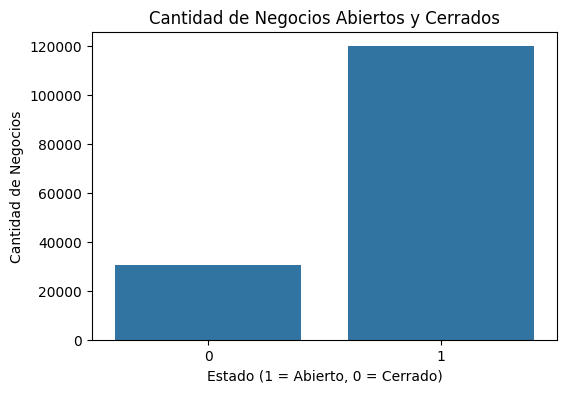

In [ ]:
# Histograma de la columna is_open

plt.figure(figsize=(6, 4))
sns.countplot(data=df_business, x='is_open')
plt.title('Cantidad de Negocios Abiertos y Cerrados')
plt.xlabel('Estado (1 = Abierto, 0 = Cerrado)')
plt.ylabel('Cantidad de Negocios')
plt.show()

La mayoría de los negocios en el dataset están abiertos, representando más de $120,000$ ($80\%$) entradas.

Una cantidad menor, aproximadamente $30,000$ ($20\%$) negocios, están cerrados.


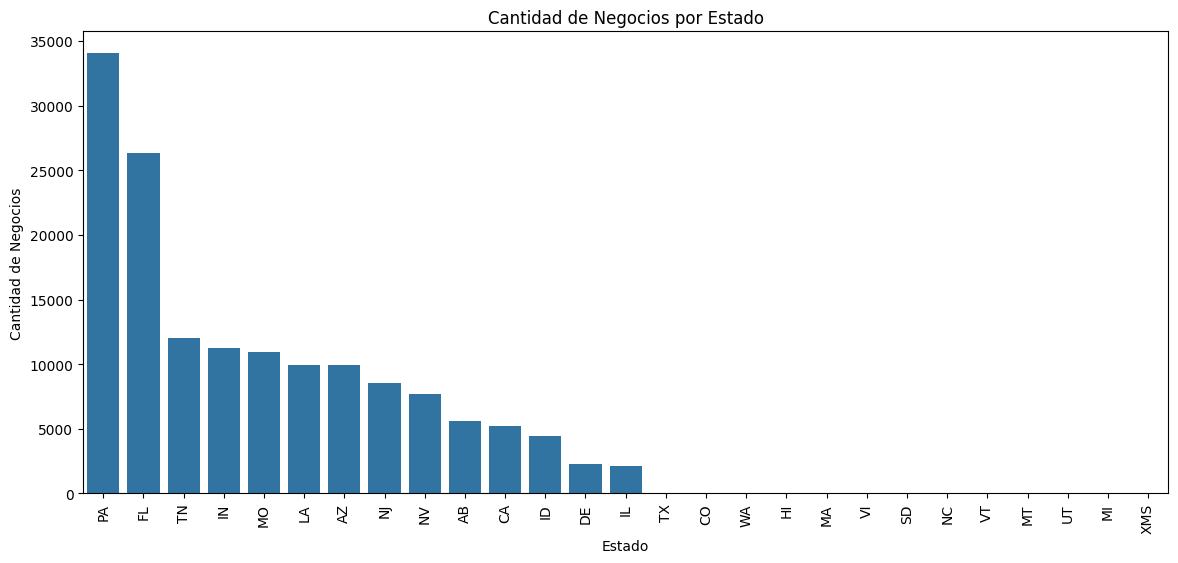

In [ ]:
# Conteo de negocios por estado

plt.figure(figsize=(14, 6))
sns.countplot(data=df_business, x='state', order=df_business['state'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Cantidad de Negocios por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Negocios')
plt.show()

- Se aprecia que PA (Pensilvania) y FL (Florida) tienen la mayor cantidad de negocios, con Pensilvania en primer lugar, alcanzando aproximadamente $35,000$ negocios, y Florida con alrededor de $25,000$.

- La cantidad de negocios disminuye significativamente después de los primeros dos estados. Estados como TN (Tennessee), IN (Indiana), y MO (Misuri) tienen también una representación considerable, pero bastante menor que los estados principales.

- A partir de la mitad de la gráfica, el número de negocios por estado se reduce aún más. Los estados al final del gráfico tienen menos de $2,000$ negocios registrados cada uno, lo cual indica una menor densidad de negocios en esos lugares.

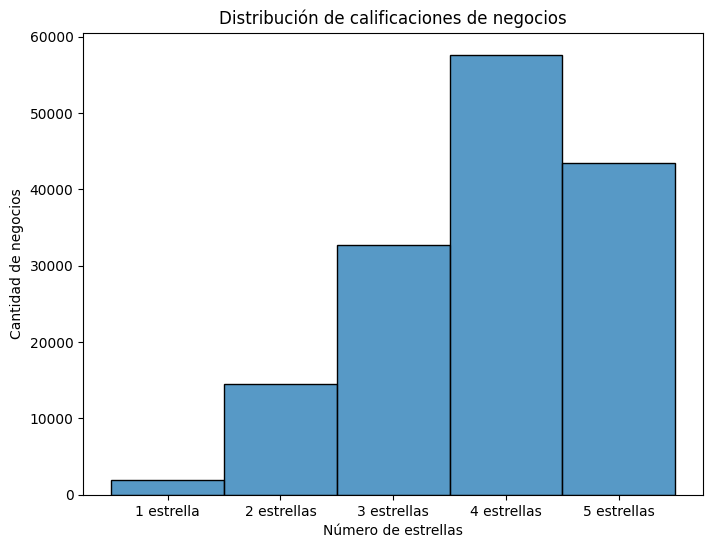

In [ ]:
# Histograma de la columna 'stars'
plt.figure(figsize=(8, 6))
sns.histplot(data=df_business, x='stars', bins=5, discrete=True)
plt.title('Distribución de calificaciones de negocios')
plt.xlabel('Número de estrellas')
plt.ylabel('Cantidad de negocios')
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=['1 estrella', '2 estrellas', '3 estrellas', '4 estrellas', '5 estrellas'])
plt.show()

Este histograma muestra la distribución de calificaciones de negocios en función de su puntuación en estrellas, de $1$ a $5$.

- Se puede apreciar que la tendencia del gráfico es ascendente a partir de 1 estrella hasta 4 estrellas, y luego desciende ligeramente en 5 estrellas. Esto indica una tendencia positiva en las calificaciones de los negocios, lo que podría ser reflejo de la satisfacción general de los usuarios con estos establecimientos.

- La mayor cantidad de negocios tienen una calificación de $4$ estrellas, lo que sugiere que la mayoría de los negocios reciben una valoración positiva de los usuarios, pero no la máxima.

- La segunda categoría más común es la de $5$ estrellas. Esto indica que un número considerable de negocios logra una calificación excelente, aunque son menos que los que obtienen $4$ estrellas.

- Las calificaciones de $3$ estrellas son relativamente frecuentes, pero mucho menos que las de $4$ y $5$ estrellas. En contraste, las de $2$ estrellas son pocas, y las de $1$ estrella son mínimas, lo que refleja que la mayoría de los negocios reciben buenas calificaciones.



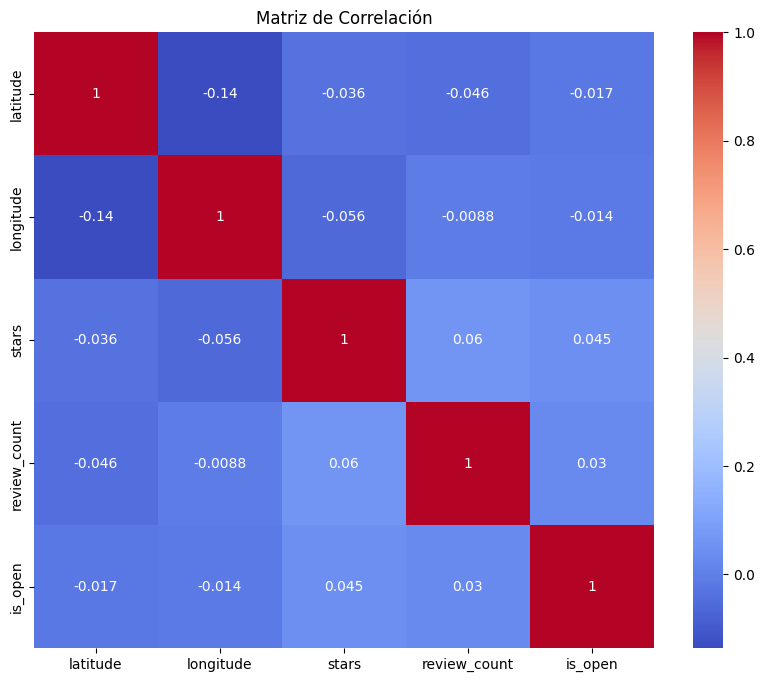

In [ ]:
# Matriz de correlación (para variables numéricas)

# Seleccionar solo las columnas numéricas
numeric_cols = df_business.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr_matrix = numeric_cols.corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Las correlaciones en esta matriz son muy bajas, lo que indica que no existen relaciones fuertes entre las variables numéricas en este dataset. Se puede infererir que cada una de estas variables opera de manera bastante independiente dentro del conjunto de datos, al menos en términos de correlación lineal.

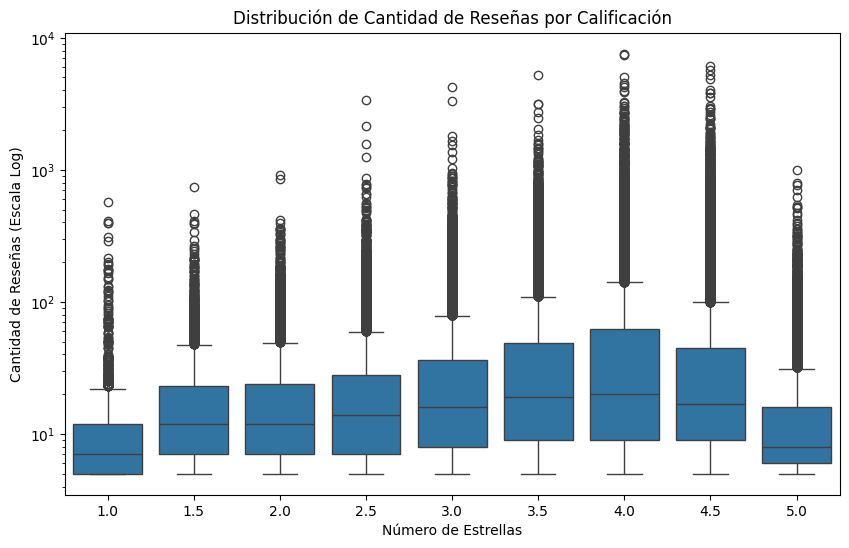

In [ ]:
# Boxplot de review_count por estrellas

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_business, x='stars', y='review_count')
plt.yscale('log')  # Escala logarítmica para ver mejor los datos
plt.title('Distribución de Cantidad de Reseñas por Calificación')
plt.xlabel('Número de Estrellas')
plt.ylabel('Cantidad de Reseñas (Escala Log)')
plt.show()

- Para cada calificación, la mediana de la cantidad de reseñas (línea central de cada caja) es relativamente baja, lo que sugiere que la mayoría de los negocios tienen un número moderado de reseñas. Esto puede deberse a que solo algunos negocios reciben una gran cantidad de reseñas, mientras que la mayoría tiene una cantidad mucho menor.

- Las cajas (rango intercuartílico) de cada calificación son bastante similares, lo que indica que la cantidad de reseñas no varía drásticamente en función de la calificación. Negocios con calificaciones de $1$ estrella y $5$ estrellas, por ejemplo, pueden tener un rango de reseñas comparable.

- Existen numerosos outliers en todas las calificaciones, especialmente en los niveles de $4$ y $5$ estrellas. Estos outliers representan negocios con una cantidad significativamente mayor de reseñas que el promedio. Esto puede indicar negocios populares o muy bien establecidos que reciben una mayor atención de los clientes.

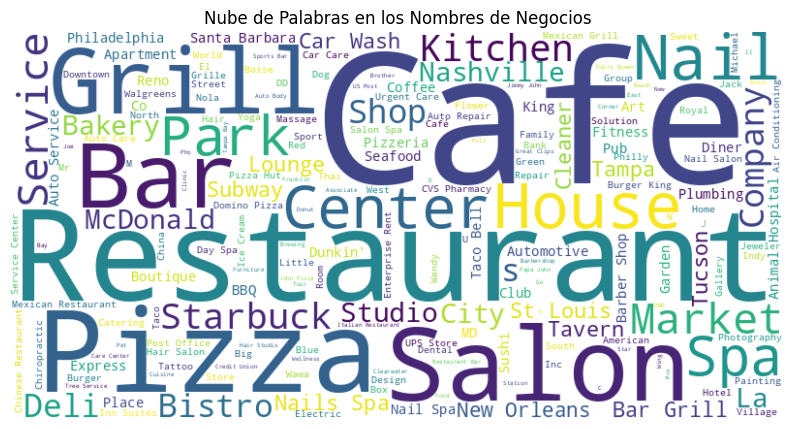

In [ ]:
# Nube de Palabras para name o categories

# Se unen todas las palabras en 'name' o 'categories'
text = " ".join(name for name in df_business['name'].dropna())

# Se genera la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras en los Nombres de Negocios')
plt.show()

Palabras como "Cafe," "Restaurant," "Bar," "Pizza," "Grill," "Deli," y "Bistro" son algunas de las más destacadas. Esto indica que una gran parte de los negocios en el dataset pertenece al sector de alimentos y bebidas. La presencia de estos términos permite inferir una alta densidad de negocios relacionados con el consumo de comida y bebida.

In [ ]:
# Frecuencia de cada ciudad
print(df_business['city'].value_counts())

city
Philadelphia    14569
Tucson           9250
Tampa            9050
Indianapolis     7540
Nashville        6971
                ...  
Reno Sparks         1
RENO AP             1
South Reno          1
Lula Lula           1
Ventura             1
Name: count, Length: 1416, dtype: int64


In [ ]:
# Contar el número de ciudades únicas
num_cities = df_business['city'].nunique()
print("Número de ciudades únicas:", num_cities)

Número de ciudades únicas: 1416


In [ ]:
# Visualizar las 10 ciudades más comunes (ajusta el número si es necesario)
top_cities = df_business['city'].value_counts().head(10)
print(top_cities)

city
Philadelphia     14569
Tucson            9250
Tampa             9050
Indianapolis      7540
Nashville         6971
New Orleans       6209
Reno              5935
Edmonton          5054
Saint Louis       4827
Santa Barbara     3829
Name: count, dtype: int64
